In [1]:
import sys
# This on is a path correcting code, which is used to find the path of QuSim.
sys.path.append('../../..')
import QuSim.DataPlot.plot_lib as pl
import QuSim.Instruments.tools as tools
import QuSim.Instruments.stochastic_gen as sg
import QuSim.System.arb_qubit_system as aqs
import QuSim.Instruments.angle as  ang
from QuSim.Instruments.angle import get_angle

import numpy as np
import matplotlib.pyplot as plt

from tqdm import *
from time import *
from sympy import*
import copy
import pickle
from qutip import*

def var_name2str(variable):
    def nested_var_name2str(value):
        if isinstance(value, list):
            return [nested_var_name2str(item) for item in value]
        else:
            for name in globals():
                if eval(name) == value:
                    return name
            return str(value)
    return nested_var_name2str(variable)

# Print the full output
np.set_printoptions(threshold=sys.maxsize)

# auto reload
%load_ext autoreload
%autoreload 2 

## Leakage scan

In [2]:
freq_list = [ # GHz
    [0, 10.35],
    [0, 10],
    [0, 10.25],
    [0, 10.15]
]

inter_list = [
    [{
        "v01": 0,
        "v00": 1,
        "v11": -1
    },
    {
        "v01": 0,
        "v00": 1,
        "v11": -1
    }
    ,
    {
        "v01": 0,
        "v00": 1,
        "v11": -1
    },
    {
        "v01": 0,
        "v00": 1,
        "v11": -1
    }],
    [{
        "v01": 1,
        "v00": 0,
        "v11": 0
    },
    {
        "v01": 1,
        "v00": 0,
        "v11": 0
    }
    ,
    {
        "v01": 1,
        "v00": 0,
        "v11": 0
    },
    {
        "v01": 1,
        "v00": 0,
        "v11": 0
    }]
    ,
    [{
        "v01": -1j,
        "v00": 0,
        "v11": 0
    },
    {
        "v01": -1j,
        "v00": 0,
        "v11": 0
    }
    ,
    {
        "v01": -1j,
        "v00": 0,
        "v11": 0
    },
    {
        "v01": -1j,
        "v00": 0,
        "v11": 0
    }]
]

r_dic = {
    "r12": 1e-3,
    "r23": 1e-3,
    "r34": 1e-3
}
r = tools.r2matrix(r_dic, freq_list) # Coupling strength

extra_list=None
## with pulse type XY
driving_list = [
    {
        "W01": 1j   # W01 represents \Omega_{01}, for the qubit with index 0
    },
    {
        "W01": 1j
    },
    {
        "W01": 1j
    },
    {
        "W01": 1j
    }
]

## with pulse type Z
bias_list = [ # Default, Z00 = 0
    {
        "Z11": 1
    },
    {
        "Z11": 1
    },
    {
        "Z11": 1
    },
    {
        "Z11": 1
    }
]

gamma_list = None

# gamma_list = None

_system_arb1 = aqs.arb_qubit_system(freq_list, inter_list, r, extra_list, gamma_list, driving_list, bias_list)

state_0000, E_0000, _= _system_arb1.get_eigenstates_energy((0,0,0,0))

state_0001, E_0001, _= _system_arb1.get_eigenstates_energy((0,0,0,1))
state_0010, E_0010, _= _system_arb1.get_eigenstates_energy((0,0,1,0))
state_0100, E_0100, _= _system_arb1.get_eigenstates_energy((0,1,0,0))
state_1000, E_1000, _= _system_arb1.get_eigenstates_energy((1,0,0,0))

"""subspace"""
state_0101, E_0101, index_0101= _system_arb1.get_eigenstates_energy((0,1,0,1))
state_1001, E_1001, index_1001= _system_arb1.get_eigenstates_energy((1,0,0,1))
state_0110, E_0110, index_0110= _system_arb1.get_eigenstates_energy((0,1,1,0))
state_1010, E_1010, index_1010= _system_arb1.get_eigenstates_energy((1,0,1,0))

"""leakage"""
state_0011, E_0011, index_0011= _system_arb1.get_eigenstates_energy((0,0,1,1))
state_1100, E_1100, index_1100= _system_arb1.get_eigenstates_energy((1,1,0,0))

state_0111, E_0111, _= _system_arb1.get_eigenstates_energy((0,1,1,1))
state_1011, E_1011, _= _system_arb1.get_eigenstates_energy((1,0,1,1))
state_1101, E_1101, _= _system_arb1.get_eigenstates_energy((1,1,0,1))
state_1110, E_1110, _= _system_arb1.get_eigenstates_energy((1,1,1,0))

state_1111, E_1111, _= _system_arb1.get_eigenstates_energy((1,1,1,1))

state_ud = Qobj(np.array([0,0,1,0]), dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket)
state_du = Qobj(np.array([0,1,0,0]), dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket)

state_dudu = tensor(state_du,state_du)
state_duud = tensor(state_du,state_ud)
state_uddu = tensor(state_ud,state_du)
state_udud = tensor(state_ud,state_ud)

_system_arb1.H

Quantum object: dims = [[2, 2, 2, 2], [2, 2, 2, 2]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[1.88495559e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.37806141e+01 1.25663706e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.25663706e-02 6.43963662e+01 0.00000000e+00
  1.25663706e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.28183263e+02
  0.00000000e+00 1.25663706e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.

In [3]:
# Construct a decoupled system
r_dic2 = {
    "r12": 0,
    "r23": 0,
    "r34": 0
}
r2 = tools.r2matrix(r_dic2, freq_list) # Coupling strength
extra_list=None
_system_arb2 = aqs.arb_qubit_system(freq_list, inter_list, r2, extra_list, gamma_list, driving_list, bias_list)
t_width = 35; 
simulation_option2 = {
    "simulation_time": t_width, # ns
    "simulation_step": 10000,
    "initial_state": [state_dudu, state_duud, state_uddu, state_udud]  # Do multiple simulation
}
# simulation_option2['simulation_time'] = 154
pulse_sequence2 = [
    {
        'pulse_index': 1, # [m,n] represents $\Omega_{mn}$
        'type': "INT",
        'pulse_shape': "cosine",
        't_delay': 0, # unit in ns
        't_width': t_width, # unit in ns
        't_plateau':simulation_option2['simulation_time'] - t_width , # unit in ns
        'freq': 0, # unit in GHz; Z pulse does not use it
        'phase': 0, # unit in rad; Z pulse does not use it
        'amplitude': 0, # XY: Rabi freq; Z: biased frequency
        'q_index': [1,2]
    }
]
result_list2, angle_list2 = _system_arb2.system_dynamics_mesolve(simulation_option2, pulse_sequence2)

q_pmatrix = np.array([[np.exp(-1j*angle_list2[0][0][0]),0,0,0], 
              [0, np.exp(-1j*angle_list2[1][0][0]), 0, 0],
              [0,0, np.exp(-1j*angle_list2[2][0][0]), 0],
              [0,0,0, np.exp(-1j *angle_list2[3][0][0])]])
# single qubit rotation correcting phase gate during ZZ inter
q_phase_gate = Qobj(q_pmatrix,
              dims = [[2,2], [2,2]])
q_phase_gate = q_phase_gate/q_phase_gate.data[0,0]
q_phase_gate

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 1.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j -1.00000000e+00-7.20829008e-07j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  -2.44807463e-06+1.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  3.13671919e-06-1.00000000e+00j]]

In [4]:
simulation_option = {
    "simulation_time": t_width, # ns
    "simulation_step": 10000,
    "initial_state": [state_dudu, state_duud, state_uddu, state_udud]  # Do multiple simulation
}

j23bias_scan_rng = np.linspace(2e-3, 7e-3, 500)
leakage_list = []
leakage_to_0011 = []; leakage_to_1100 = []; angle_cphase=[]; Cphase_melements= []
for bisa_amp in tqdm(j23bias_scan_rng):
    pulse_sequence = [
    {
        'pulse_index': 0, # [m,n] represents $\Omega_{mn}$
        'type': "INT",
        'pulse_shape': "cosine",
        't_delay': 0, # unit in ns
        't_width': t_width, # unit in ns
        't_plateau':simulation_option['simulation_time'] - t_width , # unit in ns
        'freq': 0, # unit in GHz; Z pulse does not use it
        'phase': 0, # unit in rad; Z pulse does not use it
        'amplitude': bisa_amp, # XY: Rabi freq; Z: biased frequency
        'q_index': [1,2]
    }]
    result_list, angle_list = _system_arb1.system_dynamics_mesolve(simulation_option, pulse_sequence)
    propa_list = _system_arb1.system_dynamics_propagator(simulation_option, pulse_sequence, do_progress_bar=None)
    
    dummy_list0011 = []; dummy_list1100 = []
    lk_dummy = []
    for i in range(len(simulation_option["initial_state"])):
        lk = 1 - np.abs(((state_udud + state_dudu + state_duud + state_uddu ).dag()* result_list[i].states[-1]).data[0,0])
        lk_dummy.append(lk)
    leakage_list.append(lk_dummy)

    U = propa_list[-1] # get the Unitary 
    # Perform partial trace, tracing out the coupler degree of freedom
    slist = [
        state_dudu, state_duud, state_uddu, state_udud
    ]
    sdlist = [
        state_dudu.dag(), state_duud.dag(), state_uddu.dag(), state_udud.dag()
    ]
    dims = [len(sdlist), len(slist)];   umatrix = []
    for i in range(dims[0]):
        umatrix_row = []
        for j in range(dims[1]):
            umatrix_row.append(sdlist[i] * U * slist[j])
        umatrix.append(umatrix_row)

    Usim = Qobj(np.array(umatrix).reshape(dims[0],dims[1]), dims = [[int(np.sqrt(dims[0])), int(np.sqrt(dims[0]))], [int(np.sqrt(dims[1])), int(np.sqrt(dims[1]))]])
    
    Usim = Usim/Usim.data[0,0]
    Usim_p = Usim * q_phase_gate
    # Phase gate after ZZ inter, correcting single qubit phase
    phi12 = -np.angle(Usim_p.data[1,1])
    phi34 = -np.angle(Usim_p.data[2,2])
    c_pmatrix = np.array([[1,0,0,0], 
                [0, np.exp(1j*phi12), 0, 0],
                [0,0, np.exp(1j*phi34), 0],
                [0,0,0, np.exp(1j *(phi12+phi34))]])
    # correcting phase gate
    c_phase_gate = Qobj(c_pmatrix,
                dims = [[2,2], [2,2]])
    Uphase = Usim_p * c_phase_gate
    angle_cphase.append(np.angle(Uphase.data[3,3]))
    Cphase_melements.append([Uphase.data[jj,jj] for jj in range(4)])

100%|██████████| 500/500 [2:03:55<00:00, 14.87s/it]  


In [5]:
trail = 3
data = [j23bias_scan_rng, leakage_list, angle_cphase, Cphase_melements]
pickle.dump(data, open(f'../../../Data/CZ_1D_scan_amp_{trail}.pkl', 'wb'))

In [7]:
trail = 3
data = pickle.load(open(f'../../../Data/CZ_1D_scan_amp_{trail}.pkl', 'rb'))
j23bias_scan_rng, leakage_list, angle_cphase, Cphase_melements = data

### plot_old

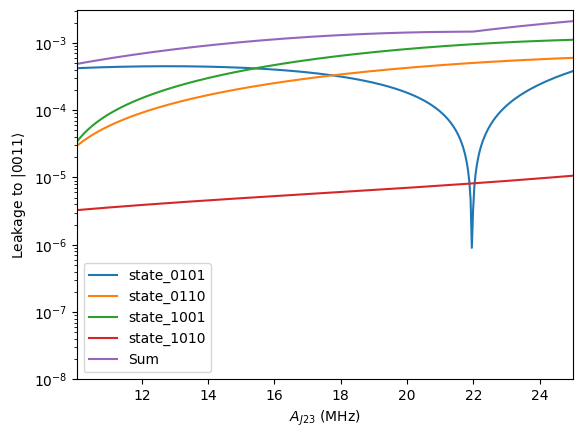

In [51]:
for ii, case in enumerate(np.transpose(leakage_to_0011)):
    labels = var_name2str(simulation_option["initial_state"][ii])
    plt.plot(j23bias_scan_rng*1e3, case, label=f"{labels}")

plt.plot(j23bias_scan_rng*1e3, np.sum(np.transpose(leakage_to_0011), axis=0), label="Sum")

# Set y-axis to logarithmic scale
plt.yscale('log')

# Specify the ticks you want to display on the y-axis
ticks = [10**(-8), 10**(-7), 10**(-6), 10**(-5), 10**(-4), 10**(-3)]  # Add more ticks as needed
plt.yticks(ticks, [f'$10^{{{int(np.log10(tick))}}}$' for tick in ticks])

plt.xlim([j23bias_scan_rng[1]*1e3, j23bias_scan_rng[-1]*1e3])
plt.ylabel(r"Leakage to $|0011\rangle$")
plt.xlabel(r"$A_{J23}$ (MHz)")
plt.legend()
plt.show()

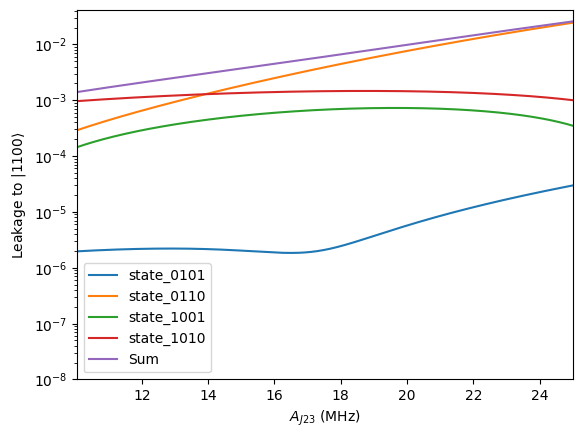

In [52]:
for ii, case in enumerate(np.transpose(leakage_to_1100)):
    labels = var_name2str(simulation_option["initial_state"][ii])
    plt.plot(j23bias_scan_rng*1e3, case, label=f"{labels}")
plt.plot(j23bias_scan_rng*1e3, np.sum(np.transpose(leakage_to_1100), axis=0), label="Sum")
# Set y-axis to logarithmic scale
plt.yscale('log')

# Specify the ticks you want to display on the y-axis
ticks = [10**(-8), 10**(-7), 10**(-6), 10**(-5), 10**(-4), 10**(-3), 10**(-2)]  # Add more ticks as needed
plt.yticks(ticks, [f'$10^{{{int(np.log10(tick))}}}$' for tick in ticks])

plt.xlim([j23bias_scan_rng[1]*1e3, j23bias_scan_rng[-1]*1e3])
plt.ylabel(r"Leakage to $|1100\rangle$")
plt.xlabel(r"$A_{J23}$ (MHz)")
plt.legend()
plt.show()


### plot new

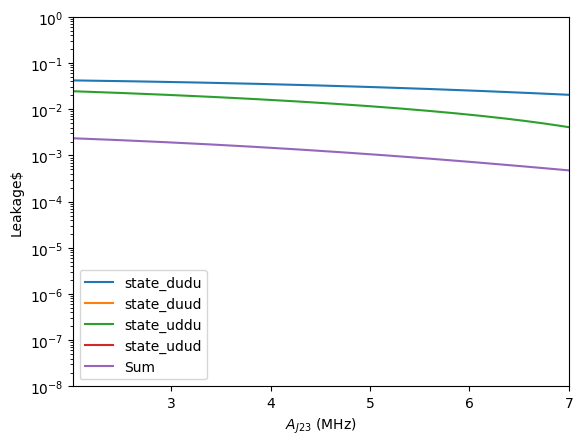

In [8]:
for ii, case in enumerate(np.transpose(leakage_list)):
    labels = var_name2str(simulation_option["initial_state"][ii])
    plt.plot(j23bias_scan_rng*1e3, case, label=f"{labels}")

plt.plot(j23bias_scan_rng*1e3, np.sum(np.transpose(leakage_list), axis=0), label="Sum")

# Set y-axis to logarithmic scale
plt.yscale('log')

# Specify the ticks you want to display on the y-axis
ticks = [10**(-8), 10**(-7), 10**(-6), 10**(-5), 10**(-4), 10**(-3), 10**(-2), 10**(-1),10**(0)]  # Add more ticks as needed
plt.yticks(ticks, [f'$10^{{{int(np.log10(tick))}}}$' for tick in ticks])

plt.xlim([j23bias_scan_rng[1]*1e3, j23bias_scan_rng[-1]*1e3])
plt.ylabel(r"Leakage$")
plt.xlabel(r"$A_{J23}$ (MHz)")
plt.legend()
plt.show()

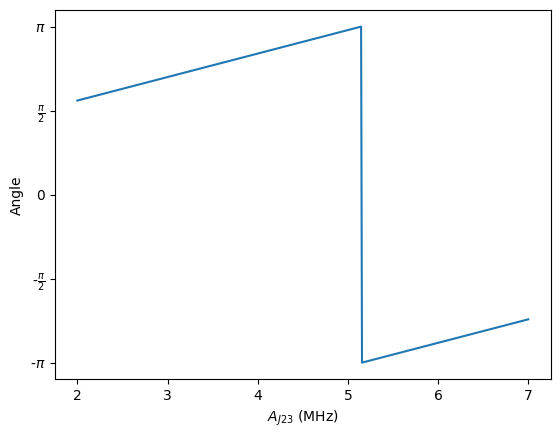

In [9]:
plt.plot(j23bias_scan_rng*1e3, angle_cphase)
plt.xlabel(r"$A_{J23}$ (MHz)")
plt.ylabel("Angle")

# Specify the ticks and their labels
ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
tick_labels = [r"-$\pi$", r"-$\frac{\pi}{2}$", "0", r"$\frac{\pi}{2}$", r"$\pi$"]

plt.yticks(ticks, tick_labels)

plt.show()




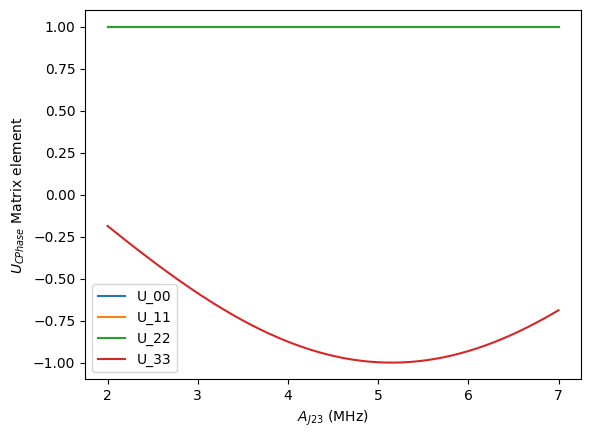

In [10]:
for ii, case in enumerate(np.transpose(Cphase_melements)):
    labels = f"U_{ii}{ii}"
    plt.plot(j23bias_scan_rng*1e3, np.real(case), label=f"{labels}")
plt.ylabel(r"$U_{CPhase}$ Matrix element")
plt.xlabel(r"$A_{J23}$ (MHz)")
plt.legend()

In [11]:
min_index = np.argmin(np.transpose(Cphase_melements)[-1][0:300])
j23bias_scan_rng[min_index]


0.004995991983967937

## CZ scan